<a href="https://colab.research.google.com/github/mdanishshaikh/colab_notebooks/blob/master/VGG16final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import ctypes
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
IMAGE_SIZE = [224, 224]
train_path = '/content/drive/MyDrive/Traininglab'
valid_path = '/content/drive/MyDrive/Testinglab'

In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False
  # useful for getting number of classes
folders = glob('/content/drive/MyDrive/Traininglab/*')
# our layers - you can add more if you want
x = Flatten()(vgg.output)
x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Traininglab', target_size = (224, 224), batch_size = 32, class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Testinglab', target_size = (224, 224), batch_size = 32, class_mode = 'categorical')


Found 532 images belonging to 7 classes.
Found 74 images belonging to 7 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 41/42
17/17 [==============================] - 20s 1s/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 42/42
17/17 [==============================] - 19s 1s/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy: 1.0000


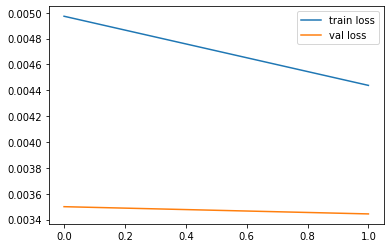

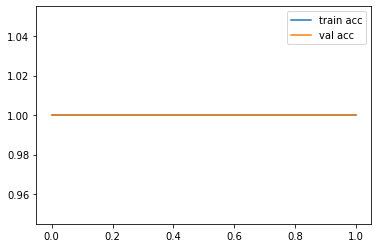

In [ ]:
# fit the model
r = model.fit_generator(training_set, validation_data=test_set, epochs=20, steps_per_epoch=len(training_set), validation_steps=len(test_set))
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [ ]:
import os
from keras.preprocessing import image
from keras.preprocessing.image import load_img

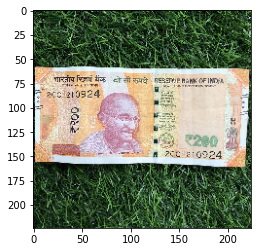

200


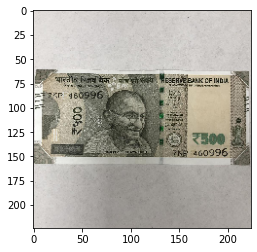

100New


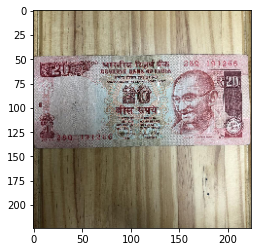

20


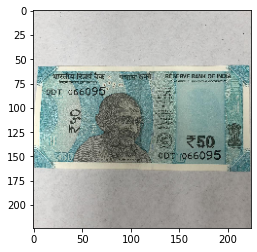

50New


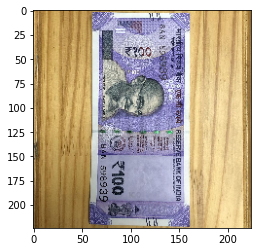

100New


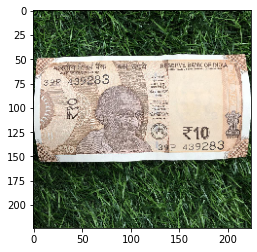

1oNew


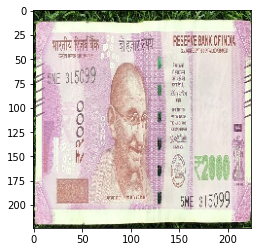

2000


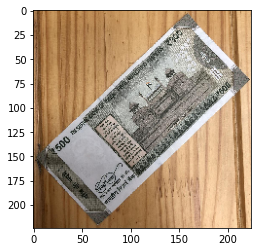

5oo


In [ ]:
path='/content/drive/MyDrive/Final'
for img in os.listdir(path):
    img=image.load_img(path+"/"+img,target_size=(224,224))
    plt.imshow(img)
    plt.show()
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    images=np.vstack([x])
    pred=model.predict(images,batch_size=1) 
    if pred[0][0]>0.5:
        print("100New")
    elif pred[0][1]>0.5:
        print("1oNew")
    elif pred[0][2]>0.5:
        print("20")
    elif pred[0][3]>0.5:
        print("200")
    elif pred[0][4]>0.5:
        print("2000")
    elif pred[0][5]>0.5:
        print("5oo")
    elif pred[0][6]>0.5:
        print("50New")
    else:
        print("Not matching")

In [ ]:
model.save('gfinal.h5')